In [ ]:

import Experiment

exp1 = {
    'experiment_module' : 'Experiment',
    'experiment_name' : 'Experiment',

    'device' : 'cuda:2',

    'trainloader_params': { 'batch_size' : 128, 'shuffle' : True},
    'testloader_params': { 'batch_size' : 128, 'shuffle' : False},

    'nn_module' : "FCNN",
    'nn_name' : 'FCN_CIFAR10',
    'nn_params' : {'num_classes' : 10},

    'optimizer_name' : 'SGD',
    'optimizer_params' : {'lr' : 0.05, 'weight_decay':0.001},

    #torch.optim.lr_scheduler.StepLR
    'scheduler_name' : 'StepLR',
    'scheduler_params' : {'step_size':1, 'gamma':0.97},

    'criterion_name' : 'CrossEntropyLoss',

    'num_epochs' : 20,

    'deficit_module' : 'BlurModule',
    'deficit_name' : 'BlurDeficit',
    'deficit_params' : {'start_epoch':0, 'end_epoch': 0, 'root_dir':'../data', 'dataset':'CIFAR10'},

}


In [2]:

# code was taken from ai generated google results
# this was the search term: 
# "python how to create a class instance from a class name passed as a string"
def get_class(module_name, class_name):
    try :
        module = __import__(module_name, fromlist=[class_name])
        cls = getattr(module, class_name)
        return cls
    except (ImportError, AttributeError) as e:
        print(f"Error: Could not get {class_name} from {module_name}. {e}")
        return None 



In [3]:

#blur_length = [0, 20, 40, 60, 80, 100, 120, 140]
blur_length = [1]

if __name__ == '__main__' :

    for deficit_duration in blur_length:
        exp1['deficit_params']['end_epoch'] = deficit_duration
        exp1['num_epochs'] = deficit_duration + 2
        exp1['output_dir'] = 'TmpTesting'

        from Trial import get_datasets
        
        trainset, testset = get_datasets()

        experiment = Experiment.Experiment(exp1)

        nn_class = get_class(exp1['nn_module'], exp1['nn_name'])
        nn_params = exp1['nn_params']

        opt = get_class('torch.optim', exp1['optimizer_name'])
        opt_params = exp1['optimizer_params']

        scheuduler = get_class('torch.optim.lr_scheduler', exp1['scheduler_name'])
        scheduler_params = exp1['scheduler_params']

        criterion_class = get_class('torch.nn', exp1['criterion_name'])

        model_wrapper = Experiment.Model(nn_class=nn_class, nn_params=nn_params, optimizer_class=opt, optimizer_params=opt_params,
                                        criterion_class=criterion_class, trainset=trainset, testset=testset, scheduler_class=scheuduler,
                                        scheduler_params=scheduler_params)


        deficit_class = get_class(exp1['deficit_module'], exp1['deficit_name'])
        deficit_params = exp1['deficit_params']
        deficit = deficit_class(deficit_params)

        experiment.add_model(model_wrapper=model_wrapper)


        experiment.add_deficit(deficit=deficit)

        experiment.train_model()



Epoch [1/3]:  LR: 0.04850000  Train Loss: 1.4929 | Train Acc: 46.24%  Val Loss: 1.4191 | Val Acc: 49.07%
Epoch [2/3]:  LR: 0.04704500  Train Loss: 0.9125 | Train Acc: 67.64%  Val Loss: 0.9985 | Val Acc: 66.13%
Epoch [3/3]:  LR: 0.04563365  Train Loss: 0.5992 | Train Acc: 79.16%  Val Loss: 0.7992 | Val Acc: 72.77%


In [4]:
from Experiment import match_experiments, plot_blur_removal
params = {}

exp_ids = match_experiments(["TmpTesting"], params=params)
print(exp_ids)

[('x91uCBIm', 'TmpTesting'), ('Z5fJKEk9', 'TmpTesting'), ('lIQzN4Rg', 'TmpTesting'), ('4zz4IuuF', 'TmpTesting'), ('GIw74WlC', 'TmpTesting')]


Already plotted end epoch 8
Already plotted end epoch 1


<Axes: xlabel='epoch', ylabel='accuracy'>

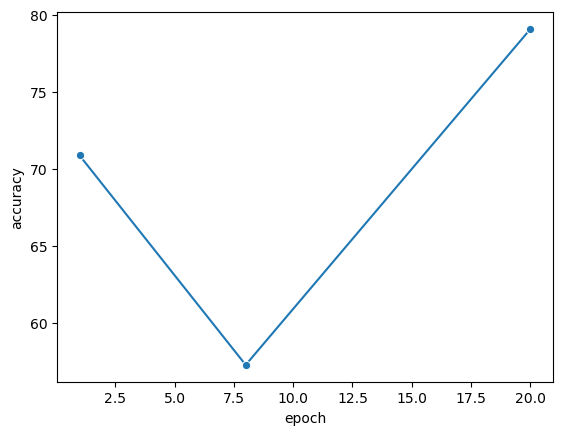

In [5]:
plot_blur_removal(exp_ids=exp_ids)

In [6]:
from datetime import datetime
now = datetime.now()
iso_format = now.isoformat()

In [7]:
print(type(iso_format))


<class 'str'>
